In [12]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from stats_functions import *
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

In [55]:
index = "^RUA"
stock = "CCJ"
period = "3y"
interval = "1wk"
beta, model = calculate_beta(index, stock, period, interval)
print(f"{stock} beta compared to {index} is: {beta.round(4)}")

CCJ beta compared to ^RUA is: 1.2116


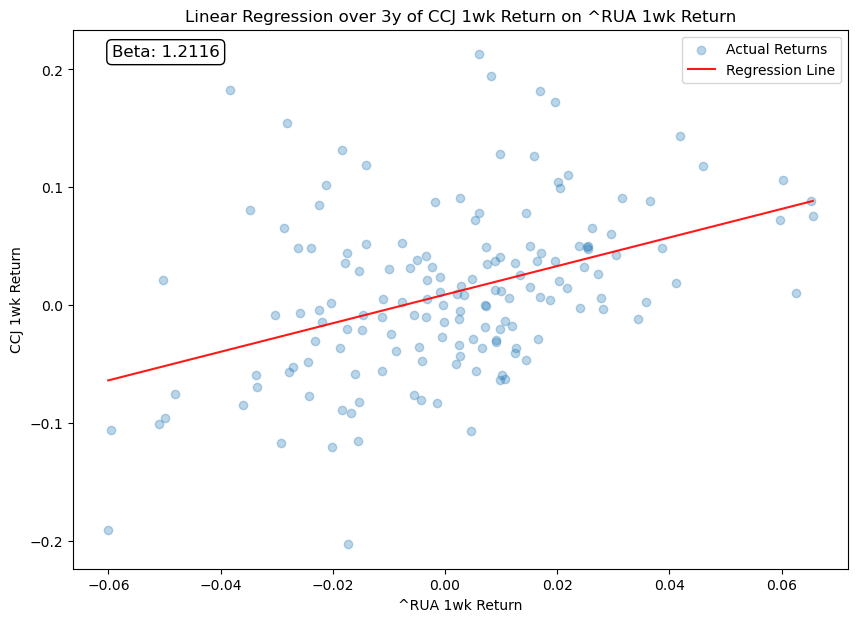

In [56]:
index_data = get_daily_data(index, period=period, interval=interval)
stock_data = get_daily_data(stock, period=period, interval=interval)


data = pd.merge(index_data, stock_data, left_index=True, right_index=True)
data[f"{index}_return"] = data[index].pct_change()
data[f"{stock}_return"] = data[stock].pct_change()
data.dropna(inplace=True)


X = data[f"{index}_return"].values.reshape(-1, 1)
y = data[f"{stock}_return"].values

X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
Y_line = model.predict(X_line)


plt.figure(figsize=(10, 7))
plt.scatter(X, y, alpha=0.3, label="Actual Returns")
plt.plot(X_line, Y_line, "r", alpha=0.9, label="Regression Line")
plt.xlabel(f"{index} {interval} Return")
plt.ylabel(f"{stock} {interval} Return")
plt.title(
    f"Linear Regression over {period} of {stock} {interval} Return on {index} {interval} Return"
)


beta_annotation = f"Beta: {beta:.4f}"
plt.annotate(
    beta_annotation,
    xy=(0.05, 0.95),
    xycoords="axes fraction",
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"),
)

plt.legend()
plt.show()